In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NeuralNetwork:
    def __init__(self, learning_rate):
        self.weights = np.array([np.random.randn(), np.random.randn()])
        self.bias = np.random.randn()
        self.learning_rate = learning_rate

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_deriv(self, x):
        return self._sigmoid(x) * (1 - self._sigmoid(x))

    def predict(self, input_vector):
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2
        return prediction

    def _compute_gradients(self, input_vector, target):
        # Feedforward
        layer_1 = np.dot(input_vector, self.weights) + self.bias
        layer_2 = self._sigmoid(layer_1)
        prediction = layer_2

        # Backpropagation
        derror_dprediction = 2 * (prediction - target)
        dprediction_dlayer1 = self._sigmoid_deriv(layer_1)
        dlayer1_dbias = 1
        dlayer1_dweights = (0 * self.weights) + (1 * input_vector)

        derror_dbias = (derror_dprediction * dprediction_dlayer1 * dlayer1_dbias)
        derror_dweights = (derror_dprediction * dprediction_dlayer1 * dlayer1_dweights)

        return derror_dbias, derror_dweights

    def _update_parameters(self, derror_dbias, derror_dweights):
        self.bias = self.bias - (derror_dbias * self.learning_rate)
        self.weights = self.weights - (derror_dweights * self.learning_rate)
        
    def train(self, input_vectors, targets, iterations):
        cumulative_errors = []
        
        for current_iteration in range(iterations):
            # Pick a data instance at random
            random_data_index = np.random.randint(len(input_vectors)) # Posición
            input_vector = input_vectors[random_data_index] # Agarra el input vector de la posición
            target = targets[random_data_index] # Agarra el input target de la posición

            # Compute the gradients and update the weights
            derror_dbias, derror_dweights = self._compute_gradients(
                input_vector, target)

            self._update_parameters(derror_dbias, derror_dweights)

            # Measure the cumulative error for all the instances
            if current_iteration % 100 == 0:
                cumulative_error = 0
                
                # Loop through all the instances to measure the error
                for data_instance_index in range(len(input_vectors)):
                    data_point = input_vectors[data_instance_index]
                    target = targets[data_instance_index]

                    prediction = self.predict(data_point)
                    error = np.square(prediction - target)

                    cumulative_error = cumulative_error + error
                cumulative_errors.append(cumulative_error)


        return cumulative_errors

In [3]:
input_vectors = np.array([[3, 1.5],
                          [2, 1],
                          [4, 1.5],
                          [3, 4],
                          [3.5, 0.5],
                          [2, 0.5],
                          [5.5, 1],
                          [1, 1],])

targets = np.array([0, 1, 0, 1, 0, 1, 1, 0])
learning_rate = 0.1

In [4]:
neural_network = NeuralNetwork(learning_rate)

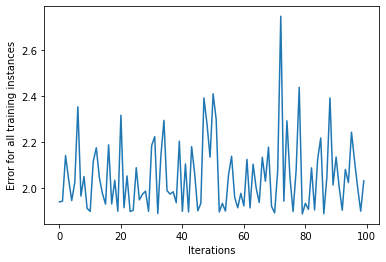

In [5]:
training_error = neural_network.train(input_vectors, targets, 10000)

plt.plot(training_error)
plt.xlabel("Iterations")
plt.ylabel("Error for all training instances")
plt.show()